In [2]:
import time
import tensorflow as tf
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import numpy as np
from numpy import newaxis
import matplotlib.pyplot as plt

Using TensorFlow backend.


Training:


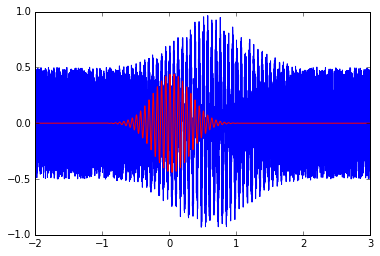

Testing:


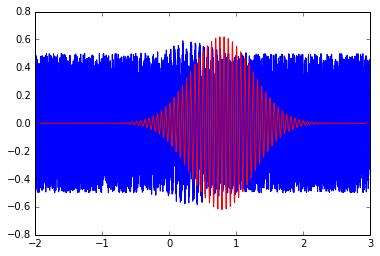

In [120]:
def myfunc(t):
    A = np.random.rand(1)
    B = np.random.rand(1)
    C = np.random.rand(1)
    D = 100 + np.random.rand(1)
    E = np.random.rand(1)
    F = 0 # having trouble shifting graph -- get exact values and plot on Desmos
    return (A * np.exp(-(np.square((t-F)-B))/(np.square(C))) * np.sin(D*t + E))
    
vfunc = np.vectorize(myfunc)

def noisy(y):
    noise = np.random.uniform(-0.5, 0.5, size=y.shape)
    # try reducing noise range, and try np.random.normal
    return y + noise

t = np.linspace(-2, 3, 8192)

# Generate training data
clean_data = []
noisy_data = []
for i in range(4500):
    clean_data.append(t)
    clean_data[i] = myfunc(clean_data[i])
    noisy_data.append(t)
    noisy_data[i] = noisy(clean_data[i])
    
print("Training:")
plt.cla()
plt.plot(t, noisy_data[int(np.random.uniform(0, 4500))], "b-")
plt.plot(t, clean_data[int(np.random.uniform(0, 4500))], "r-")
plt.show()

# Generate test data
clean_data_test = []
noisy_data_test = []
for i in range(500):
    clean_data_test.append(t)
    clean_data_test[i] = myfunc(clean_data_test[i])
    noisy_data_test.append(t)
    noisy_data_test[i] = noisy(clean_data_test[i])

print("Testing:")
plt.cla()
plt.plot(t, noisy_data_test[int(np.random.uniform(0, 500))], "b-")
plt.plot(t, clean_data_test[int(np.random.uniform(0, 500))], "r-")
plt.show()

x_train = np.asarray(noisy_data)
y_train = np.asarray(clean_data)
x_test = np.asarray(noisy_data_test)
y_test = np.asarray(clean_data_test)

# Adding an extra dimension as Keras LSTM layers take in a NumPy array of 3 dimensions
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))